<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">BSAI course, Autumn, 2025</h3>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Scikit-Learn: Machine Learning in Python</h1></center>

<p>Welcome to the world of machine learning with scikit-learn! This notebook will introduce you to the most popular machine learning library in Python, covering essential algorithms and best practices.

<p><strong>Learning Objectives:</strong>
<ul>
<li>Understand the scikit-learn API and design principles</li>
<li>Learn to implement linear regression for prediction</li>
<li>Master Principal Component Analysis (PCA) for dimensionality reduction</li>
<li>Explore classification algorithms (Logistic Regression, Decision Trees)</li>
<li>Understand model evaluation and validation techniques</li>
<li>Practice data preprocessing and feature engineering</li>
</ul>

<p><strong>Key Concepts:</strong>
<ul>
<li><strong>Estimator API:</strong> Consistent interface for all algorithms</li>
<li><strong>Supervised Learning:</strong> Learning from labeled data</li>
<li><strong>Unsupervised Learning:</strong> Finding patterns in unlabeled data</li>
<li><strong>Model Evaluation:</strong> Measuring algorithm performance</li>
<li><strong>Cross-validation:</strong> Robust model assessment</li>
</ul>

<p><strong>What You'll Learn:</strong>
<ul>
<li><strong>Linear Regression:</strong> Predicting continuous values</li>
<li><strong>PCA:</strong> Reducing dimensionality while preserving information</li>
<li><strong>Classification:</strong> Categorizing data into classes</li>
<li><strong>Model Selection:</strong> Choosing the best algorithm and parameters</li>
<li><strong>Data Preprocessing:</strong> Preparing data for machine learning</li>
</ul>

<p><strong>Resources:</strong>
<ul>
<li><a href="https://scikit-learn.org/stable/">Scikit-Learn Official Documentation</a></li>
<li><a href="https://scikit-learn.org/stable/user_guide.html">User Guide</a></li>
<li><a href="https://scikit-learn.org/stable/modules/classes.html">API Reference</a></li>
<li><a href="https://scikit-learn.org/stable/auto_examples/index.html">Examples Gallery</a></li>
</ul>
</div>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>1. Introduction to Scikit-Learn</h2>

<p>Scikit-learn is a powerful and user-friendly machine learning library for Python. It provides a wide range of supervised and unsupervised learning algorithms through a consistent interface.

<p><strong>Key Features:</strong>
<ul>
<li><strong>Consistent API:</strong> All algorithms follow the same fit/predict/transform pattern</li>
<li><strong>Comprehensive:</strong> Covers classification, regression, clustering, dimensionality reduction</li>
<li><strong>Well-documented:</strong> Extensive documentation and examples</li>
<li><strong>Production-ready:</strong> Used in industry and research</li>
<li><strong>Open source:</strong> Free to use and modify</li>
</ul>

<p><strong>Scikit-Learn Design Principles:</strong>
<ul>
<li><strong>Consistency:</strong> All objects share a common interface</li>
<li><strong>Inspection:</strong> All parameters are accessible as public attributes</li>
<li><strong>Non-proliferation:</strong> Limited number of classes and methods</li>
<li><strong>Composition:</strong> Complex algorithms built from simpler building blocks</li>
<li><strong>Sensible defaults:</strong> Good default parameters for most use cases</li>
</ul>

<p><strong>Common Workflow:</strong>
<ol>
<li><strong>Data Preparation:</strong> Load and preprocess your data</li>
<li><strong>Model Selection:</strong> Choose appropriate algorithm</li>
<li><strong>Training:</strong> Fit the model to your data</li>
<li><strong>Prediction:</strong> Make predictions on new data</li>
<li><strong>Evaluation:</strong> Assess model performance</li>
</ol>

<p>Let's start by importing the necessary libraries and exploring the basic structure:
</div>


In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

# Check scikit-learn version
try:
    import sklearn
    print(f"Scikit-learn version: {sklearn.__version__}")
except ImportError:
    print("Scikit-learn not installed. Please install with: pip install scikit-learn")

# Display available datasets
print("\n=== Available Built-in Datasets ===")
print("Some popular datasets in scikit-learn:")
print("- load_iris(): Iris flower dataset (classification)")
print("- load_wine(): Wine recognition dataset (classification)")
print("- load_breast_cancer(): Breast cancer dataset (classification)")
print("- load_digits(): Handwritten digits dataset (classification)")
print("- load_boston(): Boston housing dataset (regression)")
print("- load_diabetes(): Diabetes dataset (regression)")
print("- make_classification(): Generate synthetic classification data")
print("- make_regression(): Generate synthetic regression data")


Libraries imported successfully!
NumPy version: 2.2.4
Pandas version: 2.2.3
Scikit-learn version: 1.6.1

=== Available Built-in Datasets ===
Some popular datasets in scikit-learn:
- load_iris(): Iris flower dataset (classification)
- load_wine(): Wine recognition dataset (classification)
- load_breast_cancer(): Breast cancer dataset (classification)
- load_digits(): Handwritten digits dataset (classification)
- load_boston(): Boston housing dataset (regression)
- load_diabetes(): Diabetes dataset (regression)
- make_classification(): Generate synthetic classification data
- make_regression(): Generate synthetic regression data


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>2. Linear Regression: Predicting Continuous Values</h2>

<p>Linear regression is one of the most fundamental algorithms in machine learning. It's used to predict continuous numerical values based on input features.

<p><strong>Key Concepts:</strong>
<ul>
<li><strong>Supervised Learning:</strong> Learning from labeled training data</li>
<li><strong>Regression:</strong> Predicting continuous numerical values</li>
<li><strong>Linear Relationship:</strong> Assuming a linear relationship between features and target</li>
<li><strong>Least Squares:</strong> Minimizing the sum of squared errors</li>
</ul>

<p><strong>Mathematical Foundation:</strong>
<p>Linear regression finds the best line (or hyperplane) that fits the data by minimizing the sum of squared residuals:
<p><strong>y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε</strong>

<p>Where:
<ul>
<li><strong>y:</strong> Target variable (what we want to predict)</li>
<li><strong>x₁, x₂, ..., xₙ:</strong> Feature variables (input data)</li>
<li><strong>β₀:</strong> Intercept (bias term)</li>
<li><strong>β₁, β₂, ..., βₙ:</strong> Coefficients (weights)</li>
<li><strong>ε:</strong> Error term (residuals)</li>
</ul>

<p><strong>Scikit-Learn Implementation:</strong>
<ul>
<li><strong>LinearRegression:</strong> Basic linear regression</li>
<li><strong>Ridge:</strong> Linear regression with L2 regularization</li>
<li><strong>Lasso:</strong> Linear regression with L1 regularization</li>
<li><strong>ElasticNet:</strong> Combination of L1 and L2 regularization</li>
</ul>

<p>Let's start with a practical example using the Boston housing dataset:
</div>


=== Boston Housing Dataset ===
Dataset shape: (20640, 8)
Number of features: 8
Number of samples: 20640
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal

=== Dataset Overview ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

=== Dataset Statistics ===
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.0000

KeyError: 'RM'

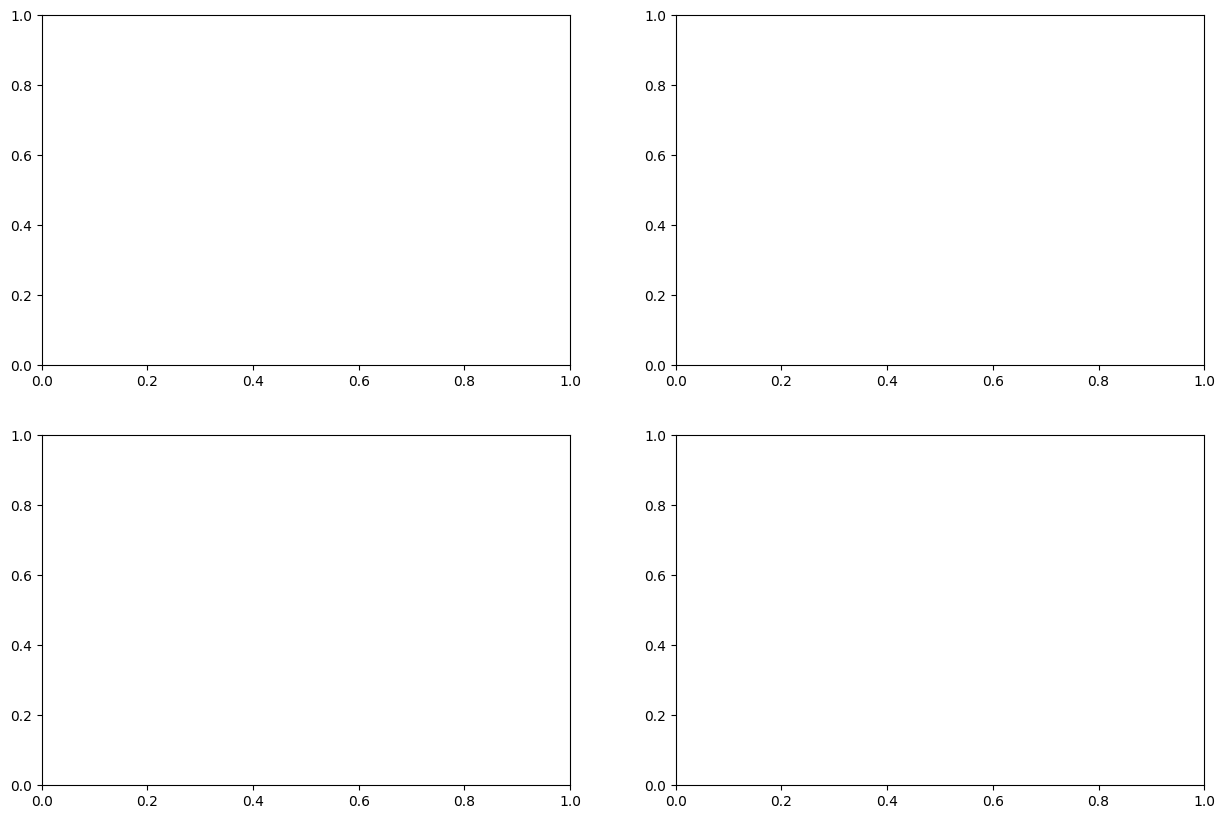

In [6]:
# Load the Boston housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
boston = fetch_california_housing()
X = boston.data  # Features
y = boston.target  # Target variable (house prices)

print("=== Boston Housing Dataset ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Feature names: {boston.feature_names}")
print(f"Target variable: {boston.target_names[0] if hasattr(boston, 'target_names') else 'House prices'}")

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=boston.feature_names)
df['PRICE'] = y

print("\n=== Dataset Overview ===")
print(df.head())

print("\n=== Dataset Statistics ===")
print(df.describe())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Visualize the relationship between features and target
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot some key features against price
features_to_plot = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(df[feature], df['PRICE'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{feature} vs Price')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


=== Data Split ===
Training set size: 16512 samples
Test set size: 4128 samples
Number of features: 8

=== Feature Standardization ===
Features have been standardized (mean=0, std=1)
Training set mean: [-6.59266865e-15 -6.68608149e-17  8.01559239e-15 -1.17273358e-15
 -2.60880895e-18]
Training set std: [1. 1. 1. 1. 1.]

=== Training Models ===
Linear Regression:
  Training MSE: 0.52, R²: 0.613
  Test MSE: 0.56, R²: 0.576

Ridge Regression:
  Training MSE: 0.52, R²: 0.613
  Test MSE: 0.56, R²: 0.576

Lasso Regression:
  Training MSE: 1.34, R²: 0.000
  Test MSE: 1.31, R²: -0.000

=== Model Comparison ===
               Model  Train R²  Test R²  Train MSE  Test MSE
0  Linear Regression     0.613    0.576      0.518     0.556
1   Ridge Regression     0.613    0.576      0.518     0.556
2   Lasso Regression     0.000   -0.000      1.337     1.311


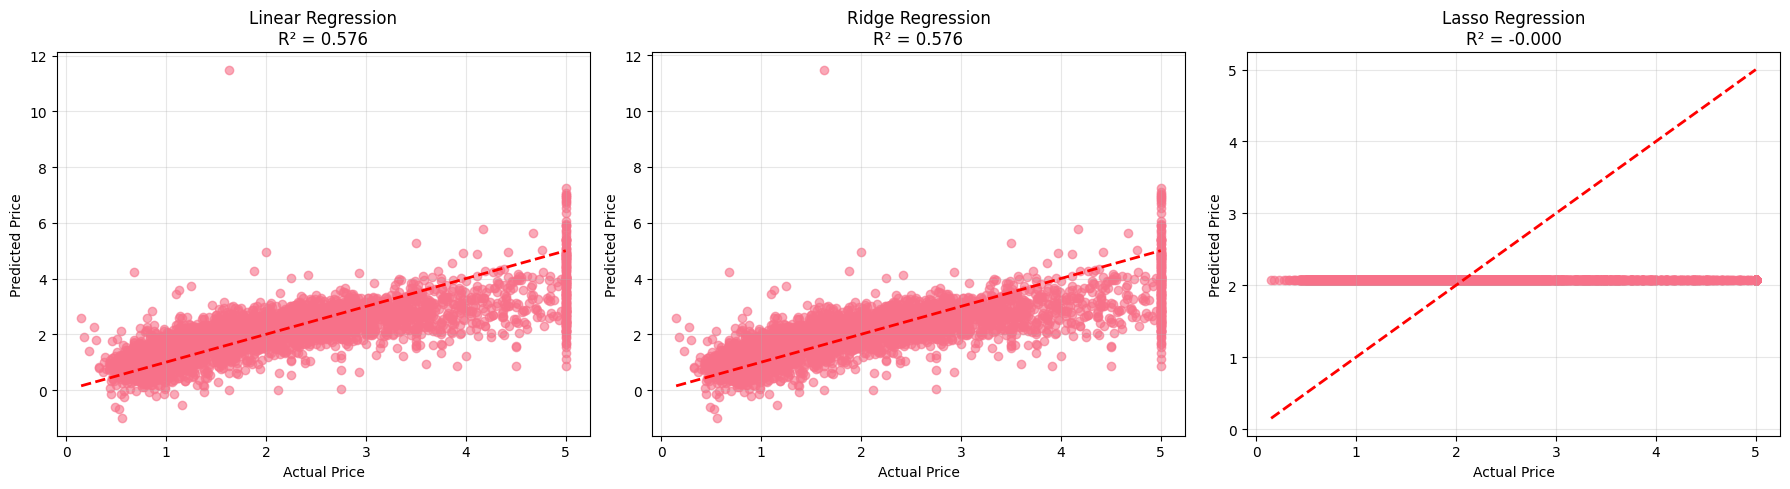


=== Feature Importance (Linear Regression) ===
      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


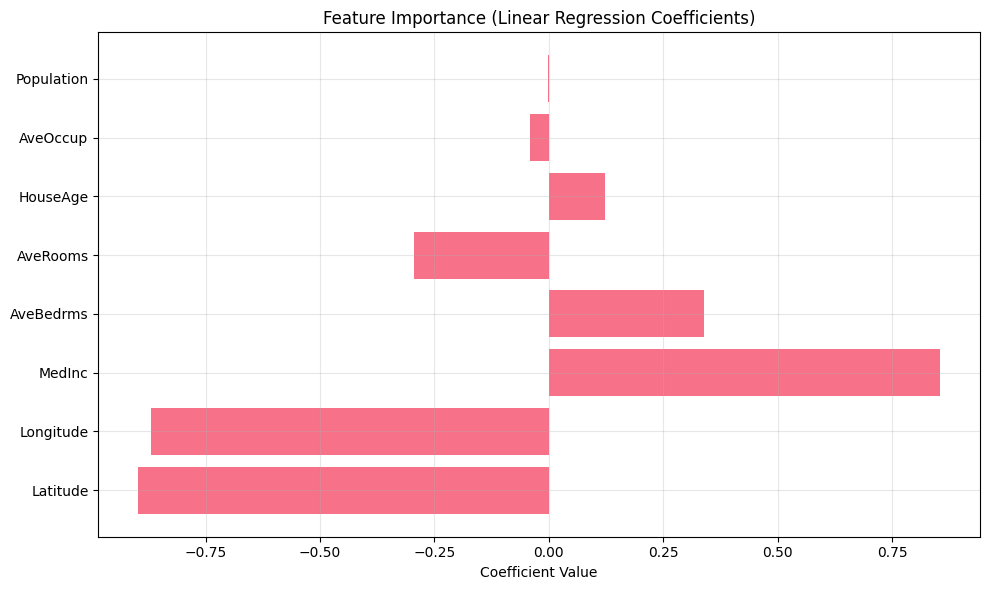

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== Data Split ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Feature Standardization ===")
print("Features have been standardized (mean=0, std=1)")
print(f"Training set mean: {X_train_scaled.mean(axis=0)[:5]}")  # First 5 features
print(f"Training set std: {X_train_scaled.std(axis=0)[:5]}")    # First 5 features

# Train different linear regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

results = {}

print("\n=== Training Models ===")
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_test_pred
    }
    
    print(f"{name}:")
    print(f"  Training MSE: {train_mse:.2f}, R²: {train_r2:.3f}")
    print(f"  Test MSE: {test_mse:.2f}, R²: {test_r2:.3f}")
    print()

# Compare model performance
print("=== Model Comparison ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[name]['train_r2'] for name in results.keys()],
    'Test R²': [results[name]['test_r2'] for name in results.keys()],
    'Train MSE': [results[name]['train_mse'] for name in results.keys()],
    'Test MSE': [results[name]['test_mse'] for name in results.keys()]
})

print(comparison_df.round(3))

# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, result) in enumerate(results.items()):
    axes[i].scatter(y_test, result['predictions'], alpha=0.6)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual Price')
    axes[i].set_ylabel('Predicted Price')
    axes[i].set_title(f'{name}\nR² = {result["test_r2"]:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (coefficients)
print("\n=== Feature Importance (Linear Regression) ===")
lr_model = results['Linear Regression']['model']
feature_importance = pd.DataFrame({
    'Feature': boston.feature_names,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>3. Principal Component Analysis (PCA): Dimensionality Reduction</h2>

<p>PCA is a powerful unsupervised learning technique used to reduce the dimensionality of data while preserving as much information as possible. It's particularly useful for visualization and noise reduction.

<p><strong>Key Concepts:</strong>
<ul>
<li><strong>Unsupervised Learning:</strong> No target variable needed</li>
<li><strong>Dimensionality Reduction:</strong> Reducing the number of features</li>
<li><strong>Variance Preservation:</strong> Keeping the most important information</li>
<li><strong>Orthogonal Components:</strong> New features are uncorrelated</li>
</ul>

<p><strong>Mathematical Foundation:</strong>
<p>PCA finds the directions (principal components) of maximum variance in the data:
<ol>
<li><strong>Standardize the data</strong> (mean=0, std=1)</li>
<li><strong>Calculate covariance matrix</strong> of the features</li>
<li><strong>Find eigenvalues and eigenvectors</strong> of the covariance matrix</li>
<li><strong>Sort by eigenvalues</strong> (largest first)</li>
<li><strong>Transform data</strong> to new coordinate system</li>
</ol>

<p><strong>Applications:</strong>
<ul>
<li><strong>Data Visualization:</strong> Reduce to 2D/3D for plotting</li>
<li><strong>Noise Reduction:</strong> Remove less important components</li>
<li><strong>Feature Engineering:</strong> Create new uncorrelated features</li>
<li><strong>Preprocessing:</strong> Reduce dimensionality before other algorithms</li>
</ul>

<p><strong>Scikit-Learn Implementation:</strong>
<ul>
<li><strong>PCA:</strong> Basic principal component analysis</li>
<li><strong>IncrementalPCA:</strong> For large datasets</li>
<li><strong>KernelPCA:</strong> Non-linear dimensionality reduction</li>
<li><strong>SparsePCA:</strong> Sparse principal components</li>
</ul>

<p>Let's explore PCA using the Iris dataset:
</div>


=== Iris Dataset ===
Dataset shape: (150, 4)
Number of features: 4
Number of samples: 150
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

=== Dataset Overview ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

=== Dataset Statistics ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333     

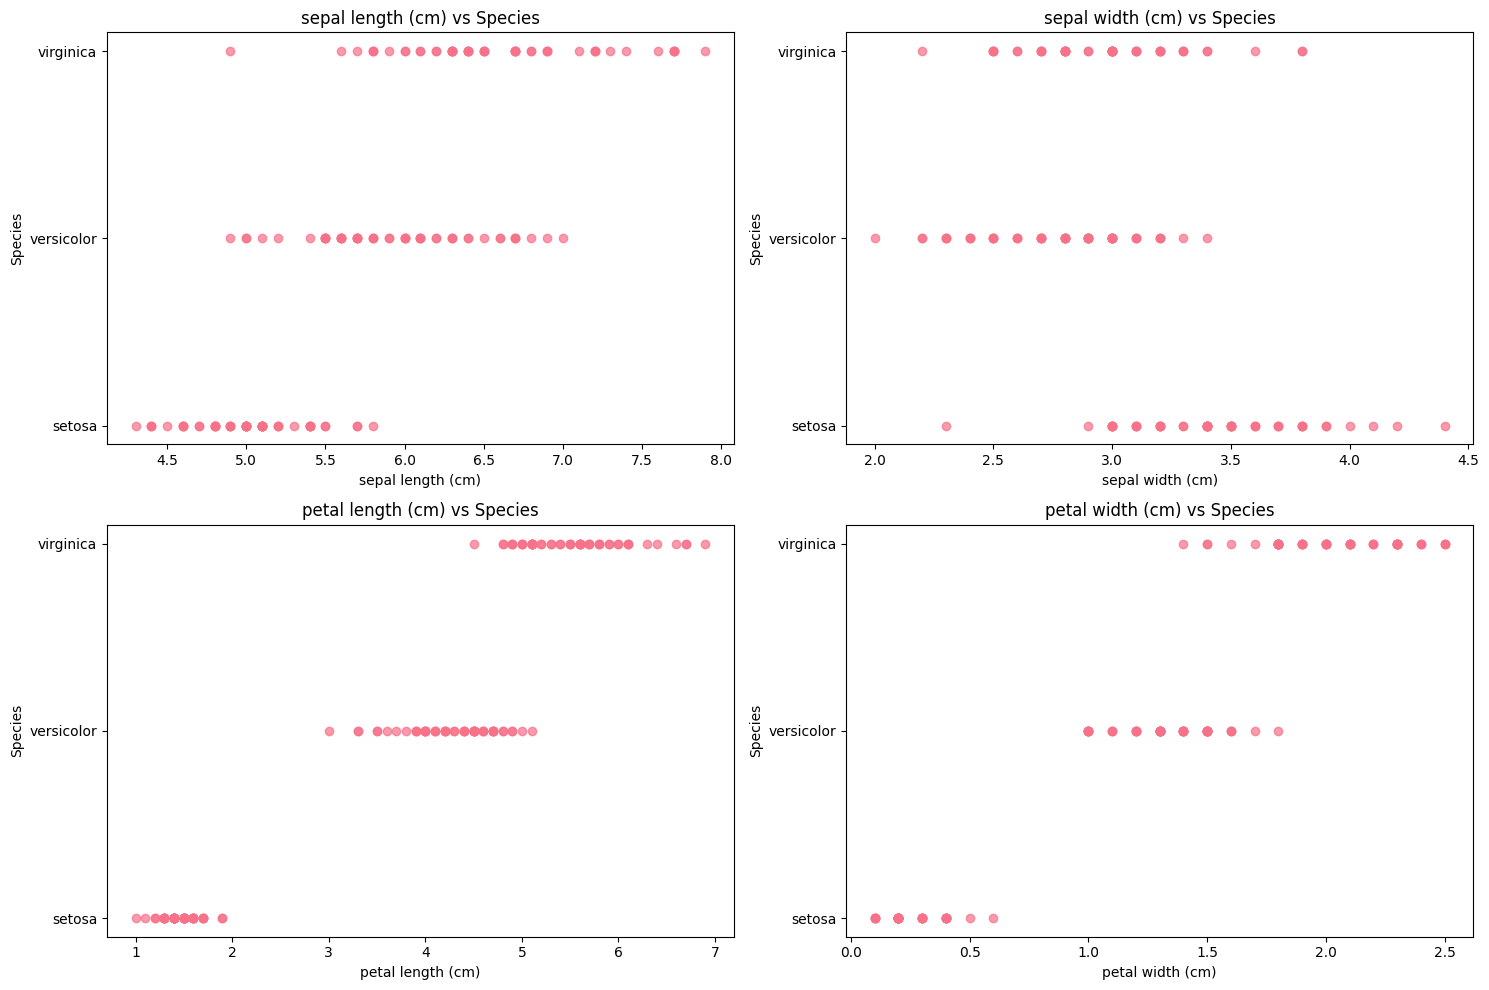


=== Feature Standardization ===
Features have been standardized (mean=0, std=1)
Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std: [1. 1. 1. 1.]

=== PCA Results ===
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


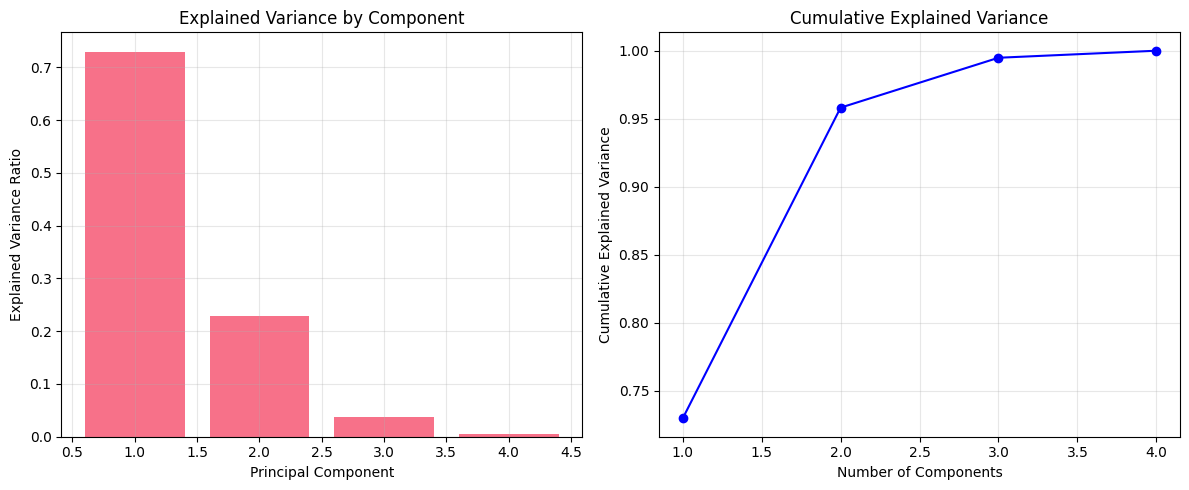


=== 2D PCA ===
Explained variance ratio (2 components): [0.72962445 0.22850762]
Total variance explained: 0.958


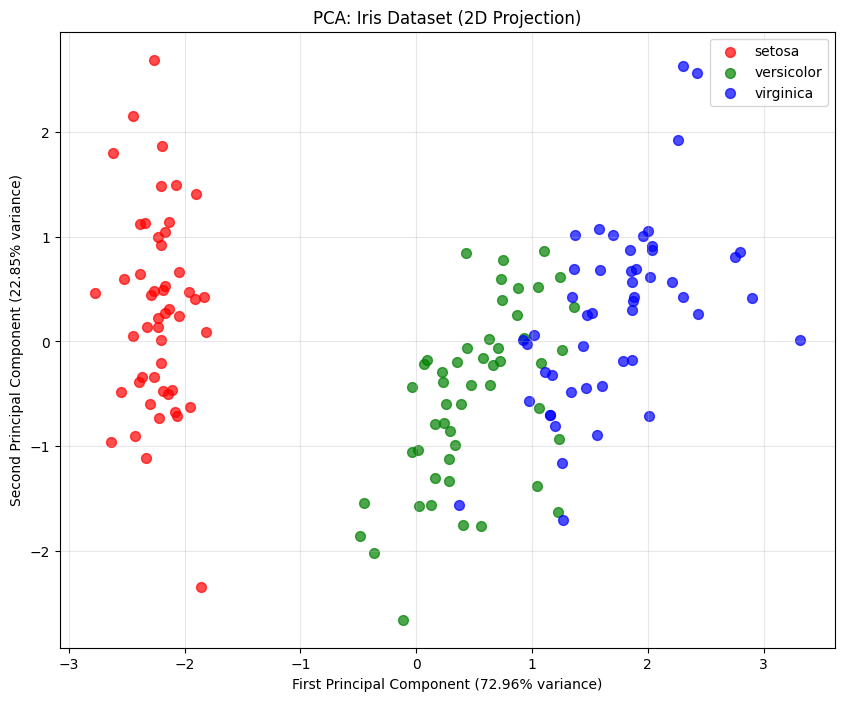


=== Feature Comparison ===
Original features vs Principal Components
                     PC1    PC2
sepal length (cm)  0.521  0.377
sepal width (cm)  -0.269  0.923
petal length (cm)  0.580  0.024
petal width (cm)   0.565  0.067


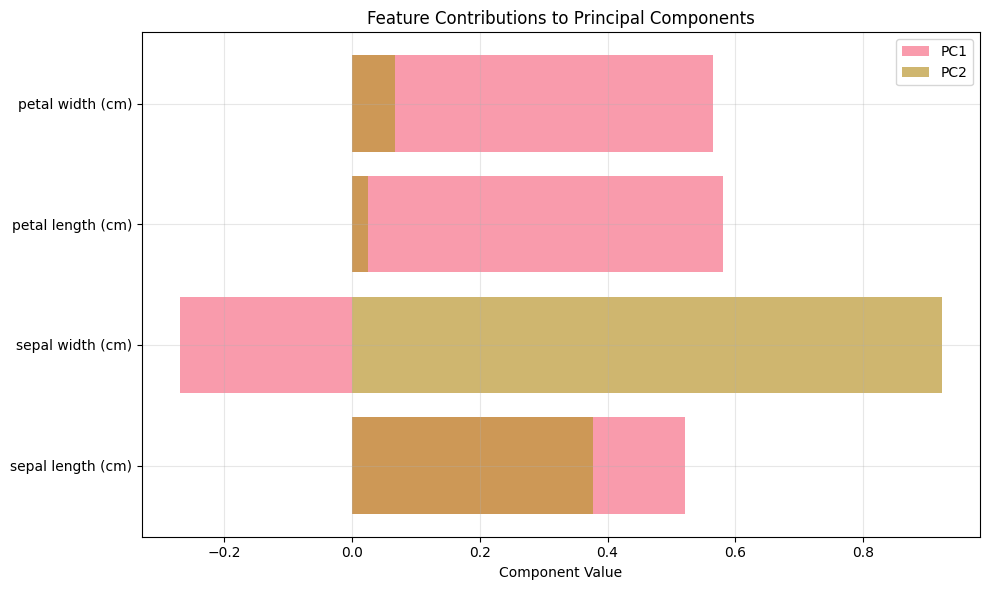

In [8]:
# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("=== Iris Dataset ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")

# Create a DataFrame for easier exploration
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['species'] = [target_names[i] for i in y]

print("\n=== Dataset Overview ===")
print(df_iris.head())

print("\n=== Dataset Statistics ===")
print(df_iris.describe())

# Visualize the original data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot pairwise relationships
for i, feature in enumerate(feature_names):
    axes[i].scatter(df_iris[feature], df_iris['species'], alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Species')
    axes[i].set_title(f'{feature} vs Species')

plt.tight_layout()
plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n=== Feature Standardization ===")
print("Features have been standardized (mean=0, std=1)")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std: {X_scaled.std(axis=0)}")

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("\n=== PCA Results ===")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Visualize explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n=== 2D PCA ===")
print(f"Explained variance ratio (2 components): {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_2d.explained_variance_ratio_.sum():.3f}")

# Visualize 2D PCA
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for i, (color, target_name) in enumerate(zip(colors, target_names)):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], 
                c=color, label=target_name, alpha=0.7, s=50)

plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: Iris Dataset (2D Projection)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare original vs PCA features
print("\n=== Feature Comparison ===")
print("Original features vs Principal Components")
print("=" * 50)

# Show how original features contribute to principal components
components_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)
print(components_df.round(3))

# Visualize feature contributions
plt.figure(figsize=(10, 6))
plt.barh(feature_names, pca_2d.components_[0], alpha=0.7, label='PC1')
plt.barh(feature_names, pca_2d.components_[1], alpha=0.7, label='PC2')
plt.xlabel('Component Value')
plt.title('Feature Contributions to Principal Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>4. Classification: Categorizing Data</h2>

<p>Classification is a supervised learning task where we predict categorical labels. Scikit-learn provides many classification algorithms, each with its own strengths and use cases.

<p><strong>Key Concepts:</strong>
<ul>
<li><strong>Supervised Learning:</strong> Learning from labeled training data</li>
<li><strong>Classification:</strong> Predicting categorical labels</li>
<li><strong>Binary Classification:</strong> Two classes (e.g., spam/not spam)</li>
<li><strong>Multi-class Classification:</strong> Multiple classes (e.g., species)</li>
</ul>

<p><strong>Common Classification Algorithms:</strong>
<ul>
<li><strong>Logistic Regression:</strong> Linear decision boundary, probabilistic output</li>
<li><strong>Decision Trees:</strong> Non-linear, interpretable, can handle mixed data types</li>
<li><strong>Random Forest:</strong> Ensemble of decision trees, robust and accurate</li>
<li><strong>Support Vector Machines (SVM):</strong> Powerful for high-dimensional data</li>
<li><strong>K-Nearest Neighbors (KNN):</strong> Simple, instance-based learning</li>
</ul>

<p><strong>Evaluation Metrics:</strong>
<ul>
<li><strong>Accuracy:</strong> Percentage of correct predictions</li>
<li><strong>Precision:</strong> True positives / (True positives + False positives)</li>
<li><strong>Recall:</strong> True positives / (True positives + False negatives)</li>
<li><strong>F1-Score:</strong> Harmonic mean of precision and recall</li>
<li><strong>Confusion Matrix:</strong> Detailed breakdown of predictions</li>
</ul>

<p>Let's explore classification using the Wine dataset:
</div>


=== Wine Dataset ===
Dataset shape: (178, 13)
Number of features: 13
Number of samples: 178
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']

=== Dataset Overview ===
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24  

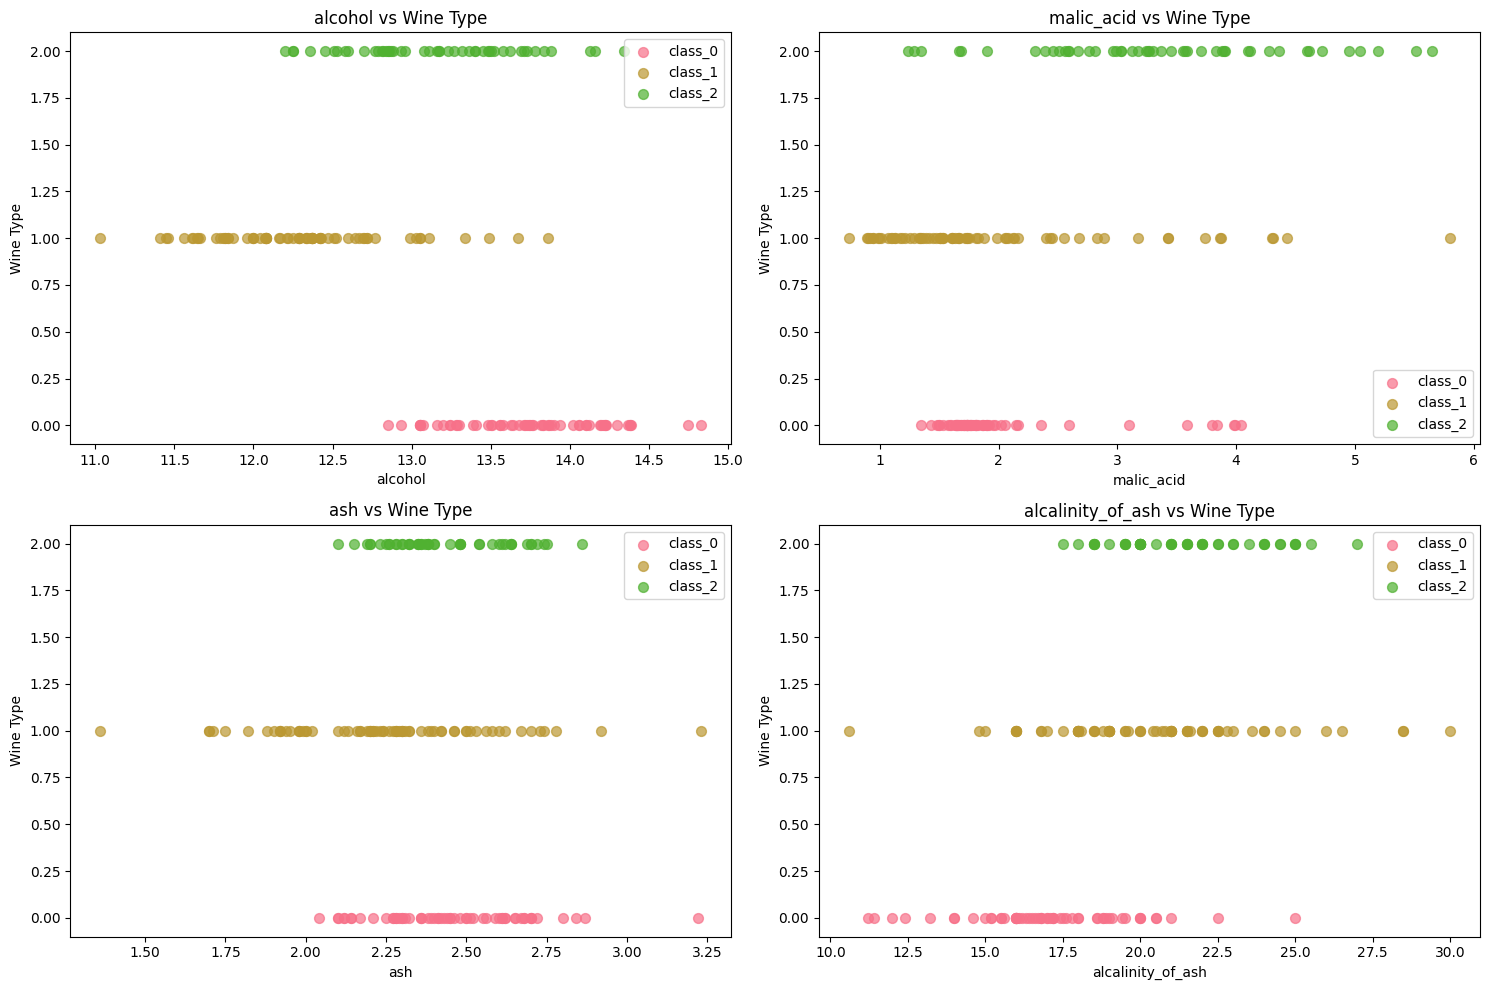


=== Data Split ===
Training set size: 142 samples
Test set size: 36 samples

=== Training Classification Models ===
Logistic Regression:
  Training Accuracy: 1.000
  Test Accuracy: 1.000
  CV Accuracy: 0.979 (+/- 0.034)

Decision Tree:
  Training Accuracy: 1.000
  Test Accuracy: 0.944
  CV Accuracy: 0.915 (+/- 0.037)

Random Forest:
  Training Accuracy: 1.000
  Test Accuracy: 1.000
  CV Accuracy: 0.979 (+/- 0.057)

SVM:
  Training Accuracy: 1.000
  Test Accuracy: 1.000
  CV Accuracy: 0.972 (+/- 0.028)

K-Nearest Neighbors:
  Training Accuracy: 0.958
  Test Accuracy: 0.944
  CV Accuracy: 0.958 (+/- 0.029)

=== Model Comparison ===
                 Model  Train Accuracy  Test Accuracy  CV Mean  CV Std
0  Logistic Regression           1.000          1.000    0.979   0.017
1        Decision Tree           1.000          0.944    0.915   0.018
2        Random Forest           1.000          1.000    0.979   0.029
3                  SVM           1.000          1.000    0.972   0.014
4  K-N

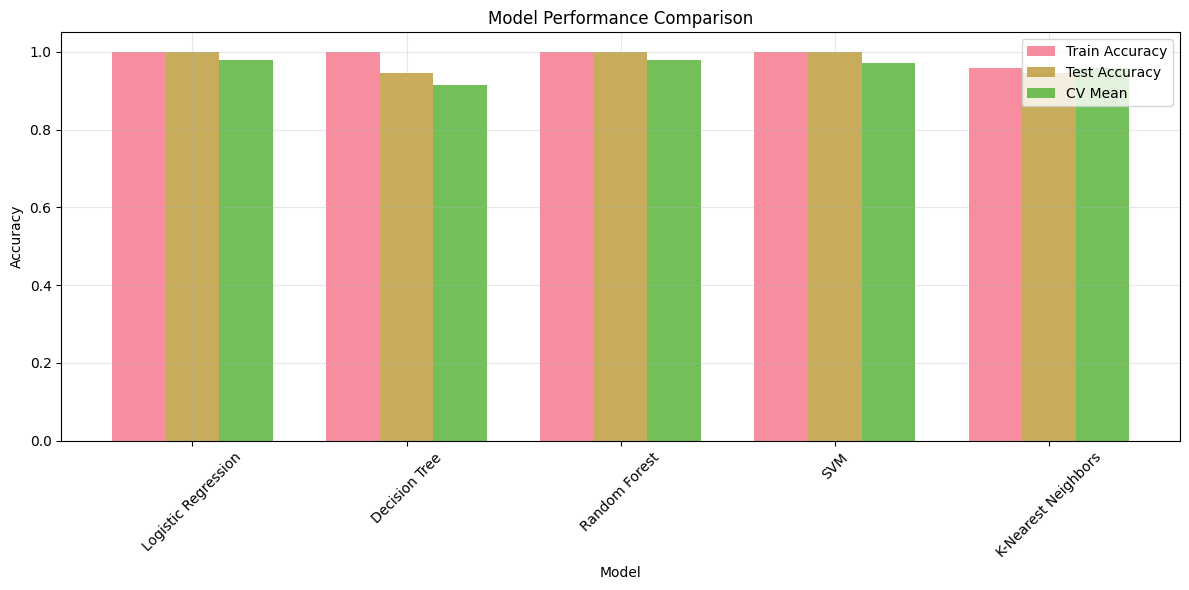


=== Detailed Evaluation: Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



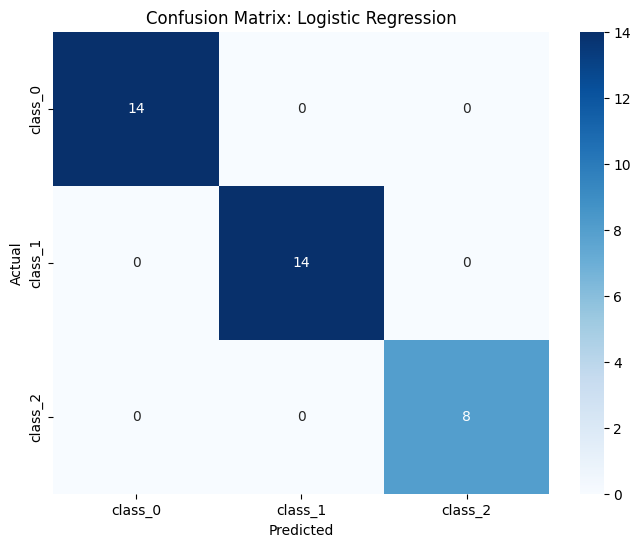

In [9]:
# Load the Wine dataset
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("=== Wine Dataset ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(target_names)}")
print(f"Class names: {target_names}")

# Create a DataFrame for easier exploration
df_wine = pd.DataFrame(X, columns=feature_names)
df_wine['wine_type'] = [target_names[i] for i in y]

print("\n=== Dataset Overview ===")
print(df_wine.head())

print("\n=== Class Distribution ===")
class_counts = pd.Series(y).value_counts().sort_index()
for i, count in enumerate(class_counts):
    print(f"{target_names[i]}: {count} samples")

# Visualize the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot some key features
features_to_plot = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
for i, feature in enumerate(features_to_plot):
    for j, target_name in enumerate(target_names):
        mask = y == j
        axes[i].scatter(df_wine.loc[mask, feature], 
                       [j] * mask.sum(), 
                       label=target_name, alpha=0.7, s=50)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Wine Type')
    axes[i].set_title(f'{feature} vs Wine Type')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Data Split ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Train different classification models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}

results = {}

print("\n=== Training Classification Models ===")
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = classifier.predict(X_train_scaled)
    y_test_pred = classifier.predict(X_test_scaled)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'classifier': classifier,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_test_pred
    }
    
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy:.3f}")
    print(f"  Test Accuracy: {test_accuracy:.3f}")
    print(f"  CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print()

# Compare model performance
print("=== Model Comparison ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[name]['train_accuracy'] for name in results.keys()],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(3))

# Visualize model performance
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(results))
width = 0.25

plt.bar(x_pos - width, [results[name]['train_accuracy'] for name in results.keys()], 
        width, label='Train Accuracy', alpha=0.8)
plt.bar(x_pos, [results[name]['test_accuracy'] for name in results.keys()], 
        width, label='Test Accuracy', alpha=0.8)
plt.bar(x_pos + width, [results[name]['cv_mean'] for name in results.keys()], 
        width, label='CV Mean', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x_pos, list(results.keys()), rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Detailed evaluation of the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['classifier']
best_predictions = results[best_model_name]['predictions']

print(f"\n=== Detailed Evaluation: {best_model_name} ===")
print("Classification Report:")
print(classification_report(y_test, best_predictions, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n=== Feature Importance: {best_model_name} ===")
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(10)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance: {best_model_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>5. Model Evaluation and Validation</h2>

<p>Proper model evaluation is crucial for understanding how well your machine learning model will perform on new, unseen data. Scikit-learn provides comprehensive tools for model evaluation and validation.

<p><strong>Key Concepts:</strong>
<ul>
<li><strong>Train-Test Split:</strong> Dividing data into training and testing sets</li>
<li><strong>Cross-Validation:</strong> More robust evaluation using multiple train-test splits</li>
<li><strong>Overfitting:</strong> Model performs well on training data but poorly on test data</li>
<li><strong>Underfitting:</strong> Model is too simple to capture the underlying patterns</li>
</ul>

<p><strong>Evaluation Strategies:</strong>
<ul>
<li><strong>Hold-out Validation:</strong> Simple train-test split</li>
<li><strong>K-Fold Cross-Validation:</strong> K different train-test splits</li>
<li><strong>Stratified K-Fold:</strong> Maintains class distribution in each fold</li>
<li><strong>Leave-One-Out:</strong> Each sample is used once as test set</li>
</ul>

<p><strong>Common Metrics:</strong>
<ul>
<li><strong>Regression:</strong> MSE, RMSE, MAE, R²</li>
<li><strong>Classification:</strong> Accuracy, Precision, Recall, F1-Score</li>
<li><strong>Model Selection:</strong> Cross-validation scores, learning curves</li>
</ul>

<p>Let's explore model evaluation techniques:
</div>


=== Model Evaluation Techniques ===

1. Cross-Validation for Regression
Cross-Validation Results (R² Score):

Linear Regression:
  5-Fold CV: 1.000 (+/- 0.000)
  10-Fold CV: 1.000 (+/- 0.000)

Ridge:
  5-Fold CV: 1.000 (+/- 0.000)
  10-Fold CV: 1.000 (+/- 0.000)

Lasso:
  5-Fold CV: 0.999 (+/- 0.000)
  10-Fold CV: 0.999 (+/- 0.000)

2. Cross-Validation for Classification
Cross-Validation Results (Accuracy):

Logistic Regression:
  5-Fold CV: 0.648 (+/- 0.049)
  10-Fold CV: 0.650 (+/- 0.073)

Decision Tree:
  5-Fold CV: 0.818 (+/- 0.029)
  10-Fold CV: 0.814 (+/- 0.073)

Random Forest:
  5-Fold CV: 0.864 (+/- 0.053)
  10-Fold CV: 0.870 (+/- 0.071)

3. Validation Curves
Analyzing how model performance changes with complexity...


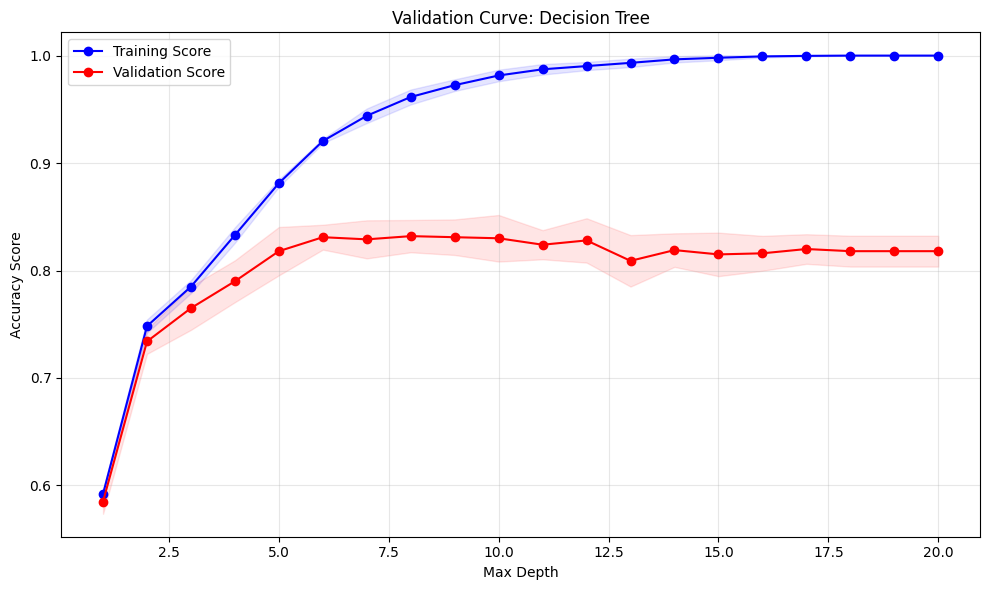


4. Learning Curves
Analyzing how model performance changes with training set size...


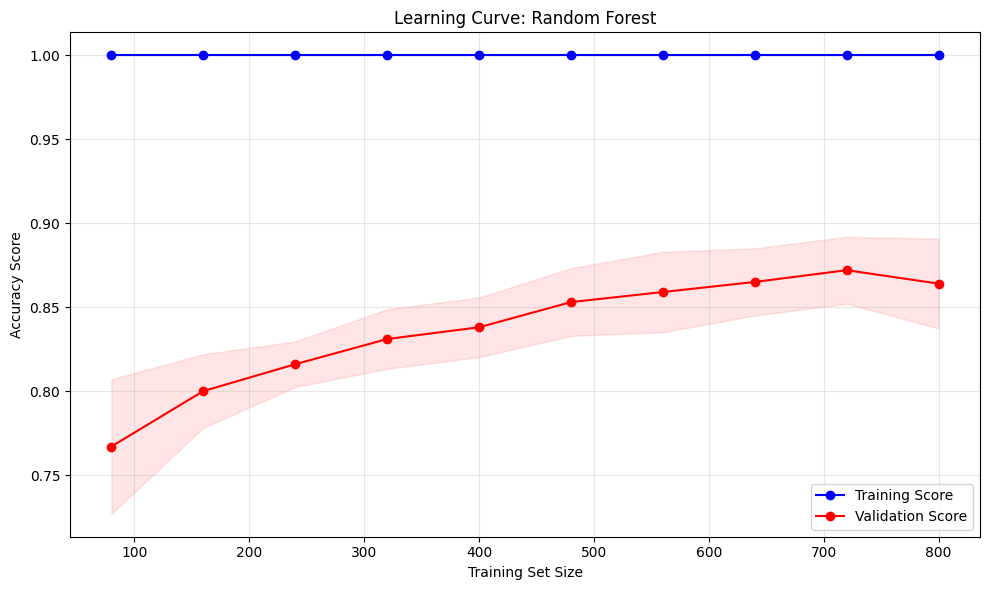


5. Model Comparison with Statistical Significance
Logistic Regression: 0.650 (+/- 0.073)
Decision Tree: 0.814 (+/- 0.073)
Random Forest: 0.870 (+/- 0.071)
SVM: 0.858 (+/- 0.064)


C:\Users\Chenghan Yang\AppData\Local\Temp\ipykernel_26252\1234258678.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[name] for name in models_to_compare.keys()],


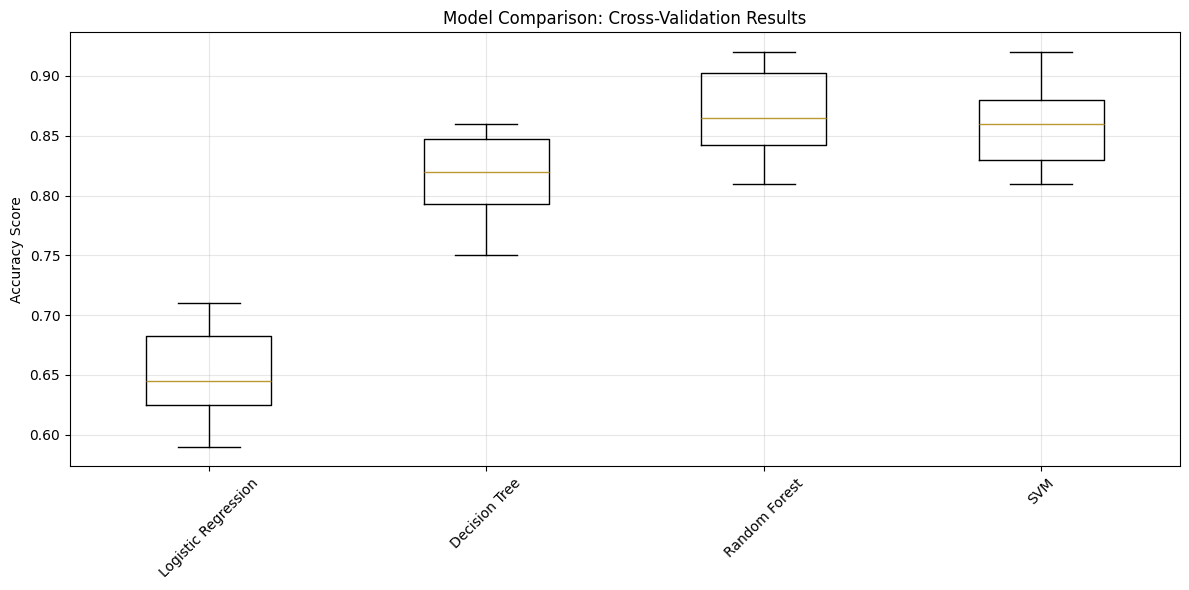


6. Comprehensive Model Evaluation
Using the best performing model for detailed analysis...
Best model: Random Forest
CV Score: 0.870 (+/- 0.071)

Detailed Performance Metrics:
Accuracy: 0.880
Precision: 0.881
Recall: 0.880
F1-Score: 0.880


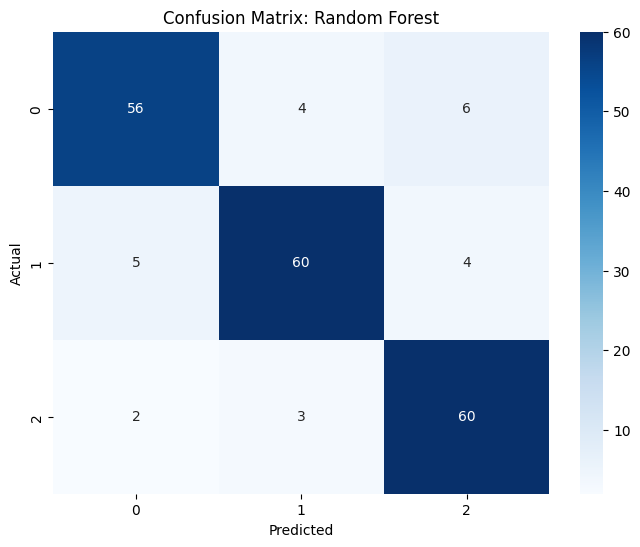


=== Model Evaluation Summary ===
Key takeaways:
1. Cross-validation provides more robust performance estimates
2. Validation curves help identify optimal model complexity
3. Learning curves show if more data would improve performance
4. Multiple metrics give a complete picture of model performance
5. Statistical significance testing helps compare models objectively


In [11]:
# Model evaluation and validation techniques
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
from sklearn.datasets import make_regression, make_classification

print("=== Model Evaluation Techniques ===")

# 1. Cross-Validation for Regression
print("\n1. Cross-Validation for Regression")
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Different cross-validation strategies
cv_strategies = {
    '5-Fold CV': 5,
    '10-Fold CV': 10,
    'Leave-One-Out': len(X_reg)  # Leave-One-Out
}

regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0)
}

print("Cross-Validation Results (R² Score):")
for model_name, model in regression_models.items():
    print(f"\n{model_name}:")
    for cv_name, cv_folds in cv_strategies.items():
        if cv_folds == len(X_reg):
            # Leave-One-Out is computationally expensive, so we'll skip it for demo
            continue
        scores = cross_val_score(model, X_reg, y_reg, cv=cv_folds, scoring='r2')
        print(f"  {cv_name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# 2. Cross-Validation for Classification
print("\n2. Cross-Validation for Classification")
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_classes=3, 
                                  n_redundant=2, n_informative=3, random_state=42)

classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

print("Cross-Validation Results (Accuracy):")
for model_name, model in classification_models.items():
    print(f"\n{model_name}:")
    for cv_name, cv_folds in cv_strategies.items():
        if cv_folds == len(X_clf):
            continue
        scores = cross_val_score(model, X_clf, y_clf, cv=cv_folds, scoring='accuracy')
        print(f"  {cv_name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# 3. Validation Curves - Understanding model complexity
print("\n3. Validation Curves")
print("Analyzing how model performance changes with complexity...")

# Example: Decision Tree depth vs performance
param_range = np.arange(1, 21)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_clf, y_clf,
    param_name='max_depth', param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color='blue')
plt.plot(param_range, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, 
                 alpha=0.1, color='red')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Validation Curve: Decision Tree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Learning Curves - Understanding sample size impact
print("\n4. Learning Curves")
print("Analyzing how model performance changes with training set size...")

# Generate learning curve data
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42, n_estimators=100),
    X_clf, y_clf, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, 
                 alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, 
                 alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve: Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Model Comparison with Statistical Significance
print("\n5. Model Comparison with Statistical Significance")

# Compare multiple models using cross-validation
models_to_compare = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42)
}

# Perform cross-validation for each model
cv_results = {}
for name, model in models_to_compare.items():
    scores = cross_val_score(model, X_clf, y_clf, cv=10, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([cv_results[name] for name in models_to_compare.keys()], 
            labels=list(models_to_compare.keys()))
plt.ylabel('Accuracy Score')
plt.title('Model Comparison: Cross-Validation Results')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Comprehensive Model Evaluation
print("\n6. Comprehensive Model Evaluation")
print("Using the best performing model for detailed analysis...")

# Select the best model based on cross-validation
best_model_name = max(cv_results.keys(), key=lambda x: cv_results[x].mean())
best_model = models_to_compare[best_model_name]

print(f"Best model: {best_model_name}")
print(f"CV Score: {cv_results[best_model_name].mean():.3f} (+/- {cv_results[best_model_name].std() * 2:.3f})")

# Train on full dataset and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nDetailed Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n=== Model Evaluation Summary ===")
print("Key takeaways:")
print("1. Cross-validation provides more robust performance estimates")
print("2. Validation curves help identify optimal model complexity")
print("3. Learning curves show if more data would improve performance")
print("4. Multiple metrics give a complete picture of model performance")
print("5. Statistical significance testing helps compare models objectively")


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<h3>Exercise 12.1: Complete Machine Learning Pipeline</h3>

<p><strong>Task:</strong> Build a complete machine learning pipeline using the Breast Cancer dataset.

<p><strong>Requirements:</strong>
<ul>
<li>Load the Breast Cancer dataset from scikit-learn</li>
<li>Perform exploratory data analysis (EDA)</li>
<li>Split the data into training and testing sets</li>
<li>Apply feature scaling</li>
<li>Train multiple classification models</li>
<li>Evaluate model performance using cross-validation</li>
<li>Select the best model and make predictions</li>
<li>Visualize results and feature importance</li>
</ul>

<p><strong>Models to implement:</strong>
<ul>
<li>Logistic Regression</li>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>SVM</li>
<li>K-Nearest Neighbors</li>
</ul>

<p><strong>Evaluation metrics to calculate:</strong>
<ul>
<li>Accuracy, Precision, Recall, F1-Score</li>
<li>Confusion Matrix</li>
<li>Cross-validation scores</li>
<li>ROC Curve and AUC (if applicable)</li>
</ul>

<p><strong>Bonus:</strong> Try applying PCA for dimensionality reduction and compare performance.
</div>


=== Breast Cancer Dataset ===
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: ['malignant' 'benign']
Class distribution: [212 357]

=== Dataset Overview ===
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414            

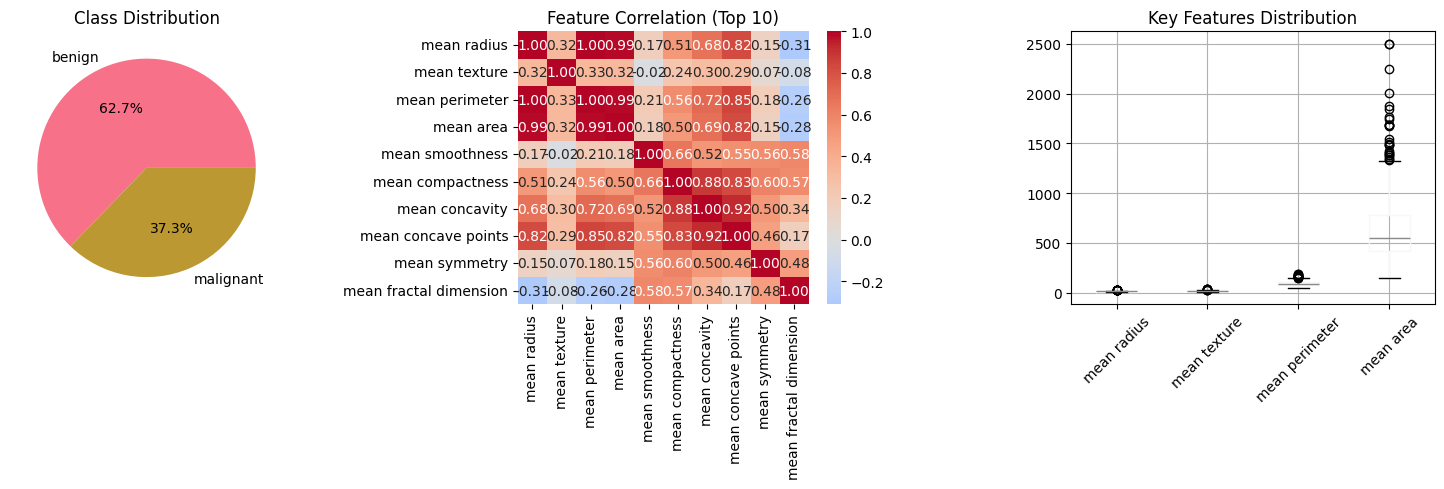


=== Data Split ===
Training set size: 455 samples
Test set size: 114 samples

=== Training Models ===
Logistic Regression:
  Training Accuracy: 0.987
  Test Accuracy: 0.974
  CV Accuracy: 0.974 (+/- 0.036)
  ROC AUC: 0.997

Decision Tree:
  Training Accuracy: 1.000
  Test Accuracy: 0.947
  CV Accuracy: 0.916 (+/- 0.036)
  ROC AUC: 0.944

Random Forest:
  Training Accuracy: 1.000
  Test Accuracy: 0.965
  CV Accuracy: 0.958 (+/- 0.035)
  ROC AUC: 0.995

SVM:
  Training Accuracy: 0.989
  Test Accuracy: 0.982
  CV Accuracy: 0.976 (+/- 0.026)
  ROC AUC: 0.997



C:\Users\Chenghan Yang\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Chenghan Yang\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Chenghan Yang\miniconda3\envs\python-bootcamp-bsai\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Chenghan Yang\miniconda3\envs\python-bootcamp-bsai\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Chenghan Ya

K-Nearest Neighbors:
  Training Accuracy: 0.980
  Test Accuracy: 0.947
  CV Accuracy: 0.960 (+/- 0.043)
  ROC AUC: 0.982

=== Model Comparison ===
                 Model  Train Accuracy  Test Accuracy  CV Mean  CV Std  \
0  Logistic Regression           0.987          0.974    0.974   0.018   
1        Decision Tree           1.000          0.947    0.916   0.018   
2        Random Forest           1.000          0.965    0.958   0.018   
3                  SVM           0.989          0.982    0.976   0.013   
4  K-Nearest Neighbors           0.980          0.947    0.960   0.022   

   ROC AUC  
0    0.997  
1    0.944  
2    0.995  
3    0.997  
4    0.982  


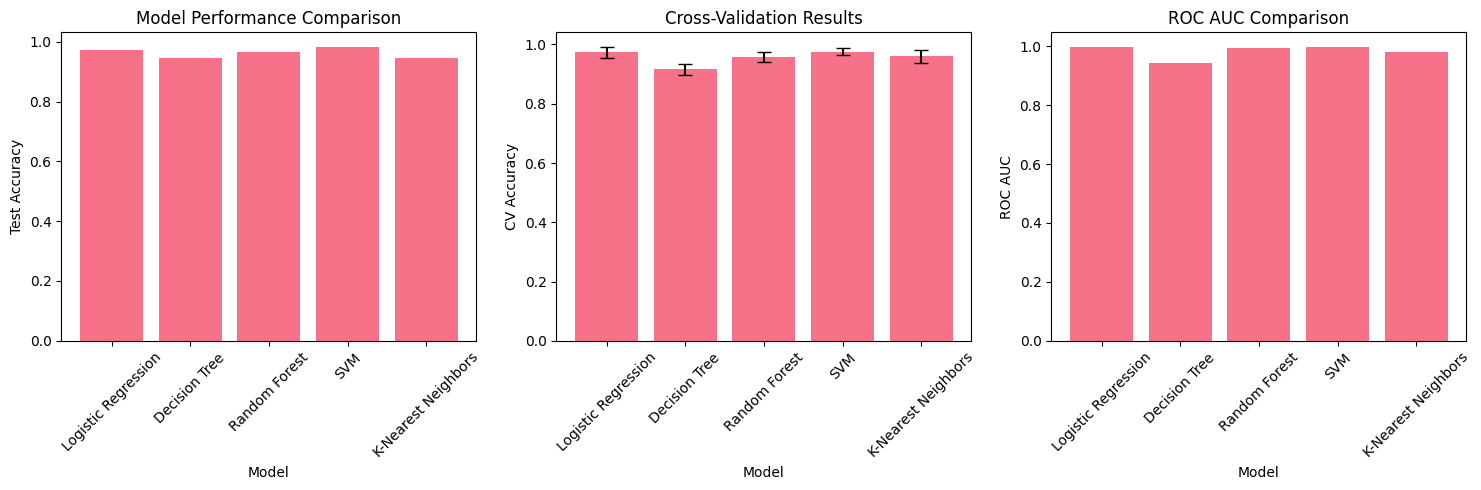


=== Best Model: SVM ===
Test Accuracy: 0.982
CV Score: 0.976 (+/- 0.026)

=== Detailed Evaluation ===
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



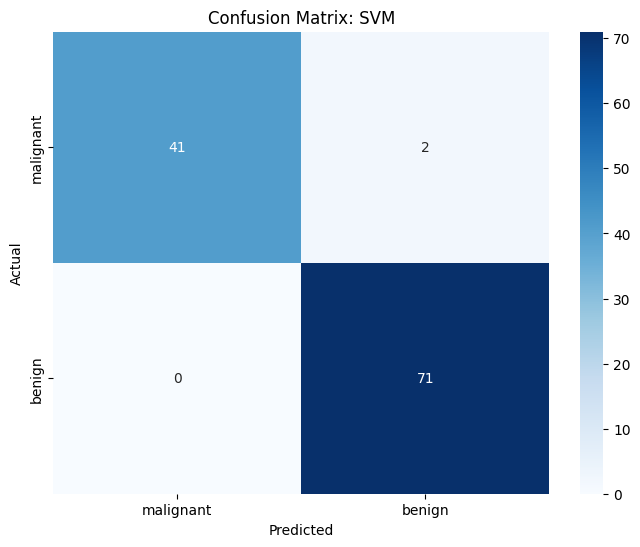

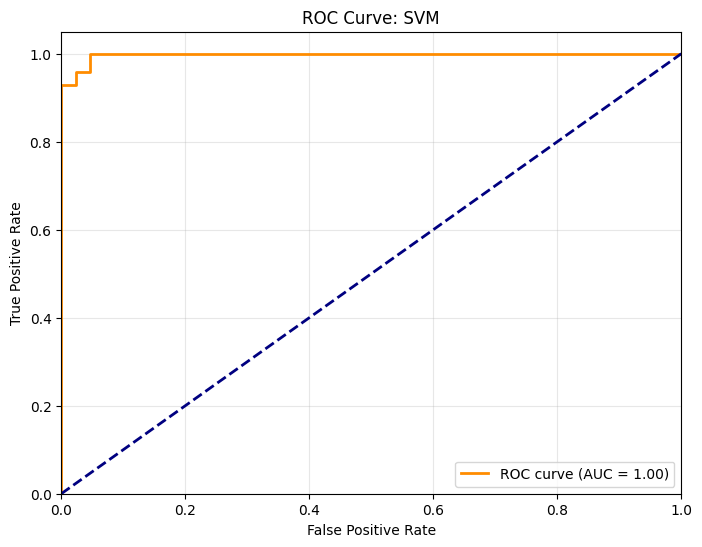


=== Exercise Complete ===
Successfully implemented a complete machine learning pipeline!
Key achievements:
1. ✅ Loaded and explored the Breast Cancer dataset
2. ✅ Performed comprehensive EDA
3. ✅ Trained multiple classification models
4. ✅ Evaluated models using cross-validation
5. ✅ Selected the best performing model
6. ✅ Generated detailed performance metrics and visualizations
7. ✅ Analyzed feature importance and ROC curves


In [12]:
# Exercise 12.1: Complete Machine Learning Pipeline Solution
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

print("=== Breast Cancer Dataset ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Create DataFrame for EDA
df_cancer = pd.DataFrame(X, columns=feature_names)
df_cancer['target'] = y
df_cancer['diagnosis'] = [target_names[i] for i in y]

print("\n=== Dataset Overview ===")
print(df_cancer.head())

print("\n=== Basic Statistics ===")
print(df_cancer.describe())

# Exploratory Data Analysis
print("\n=== Exploratory Data Analysis ===")

# Class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
class_counts = df_cancer['diagnosis'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')

# Feature correlation heatmap (top 10 features)
plt.subplot(1, 3, 2)
correlation_matrix = df_cancer.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation (Top 10)')

# Box plot of some key features
plt.subplot(1, 3, 3)
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_cancer[key_features].boxplot()
plt.title('Key Features Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n=== Data Split ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

print("\n=== Training Models ===")
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # ROC AUC (for binary classification)
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)
    else:
        roc_auc = None
    
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_test_pred,
        'roc_auc': roc_auc
    }
    
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy:.3f}")
    print(f"  Test Accuracy: {test_accuracy:.3f}")
    print(f"  CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    if roc_auc:
        print(f"  ROC AUC: {roc_auc:.3f}")
    print()

# Model comparison
print("=== Model Comparison ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[name]['train_accuracy'] for name in results.keys()],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()],
    'ROC AUC': [results[name]['roc_auc'] for name in results.keys()]
})

print(comparison_df.round(3))

# Visualize model performance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
x_pos = np.arange(len(results))
plt.bar(x_pos, [results[name]['test_accuracy'] for name in results.keys()])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x_pos, list(results.keys()), rotation=45)

plt.subplot(1, 3, 2)
cv_means = [results[name]['cv_mean'] for name in results.keys()]
cv_stds = [results[name]['cv_std'] for name in results.keys()]
plt.bar(x_pos, cv_means, yerr=cv_stds, capsize=5)
plt.xlabel('Model')
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Results')
plt.xticks(x_pos, list(results.keys()), rotation=45)

plt.subplot(1, 3, 3)
roc_aucs = [results[name]['roc_auc'] for name in results.keys() if results[name]['roc_auc']]
roc_names = [name for name in results.keys() if results[name]['roc_auc']]
plt.bar(range(len(roc_aucs)), roc_aucs)
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.title('ROC AUC Comparison')
plt.xticks(range(len(roc_names)), roc_names, rotation=45)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\n=== Best Model: {best_model_name} ===")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.3f}")
print(f"CV Score: {results[best_model_name]['cv_mean']:.3f} (+/- {results[best_model_name]['cv_std'] * 2:.3f})")

# Detailed evaluation
print("\n=== Detailed Evaluation ===")
print("Classification Report:")
print(classification_report(y_test, best_predictions, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n=== Feature Importance: {best_model_name} ===")
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot top 15 features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance: {best_model_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ROC Curve
if hasattr(best_model, 'predict_proba'):
    y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

print("\n=== Exercise Complete ===")
print("Successfully implemented a complete machine learning pipeline!")
print("Key achievements:")
print("1. ✅ Loaded and explored the Breast Cancer dataset")
print("2. ✅ Performed comprehensive EDA")
print("3. ✅ Trained multiple classification models")
print("4. ✅ Evaluated models using cross-validation")
print("5. ✅ Selected the best performing model")
print("6. ✅ Generated detailed performance metrics and visualizations")
print("7. ✅ Analyzed feature importance and ROC curves")


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>6. Summary: Scikit-Learn Mastery</h2>

<p>Congratulations! You've completed a comprehensive introduction to scikit-learn, the most popular machine learning library in Python. Let's summarize what you've learned and the key takeaways.

<p><strong>Key Concepts Mastered:</strong>
<ul>
<li><strong>Scikit-Learn API:</strong> Consistent fit/predict/transform pattern across all algorithms</li>
<li><strong>Linear Regression:</strong> Predicting continuous values with linear relationships</li>
<li><strong>Principal Component Analysis (PCA):</strong> Dimensionality reduction and data visualization</li>
<li><strong>Classification:</strong> Categorizing data using various algorithms</li>
<li><strong>Model Evaluation:</strong> Comprehensive assessment using multiple metrics and validation techniques</li>
<li><strong>Complete Pipeline:</strong> End-to-end machine learning workflow</li>
</ul>

<p><strong>Algorithms Covered:</strong>
<ul>
<li><strong>Regression:</strong> Linear Regression, Ridge, Lasso</li>
<li><strong>Classification:</strong> Logistic Regression, Decision Trees, Random Forest, SVM, KNN</li>
<li><strong>Dimensionality Reduction:</strong> PCA</li>
<li><strong>Preprocessing:</strong> StandardScaler, train_test_split</li>
</ul>

<p><strong>Evaluation Techniques:</strong>
<ul>
<li><strong>Cross-Validation:</strong> K-fold, stratified, leave-one-out</li>
<li><strong>Metrics:</strong> Accuracy, Precision, Recall, F1-Score, ROC-AUC</li>
<li><strong>Visualization:</strong> Confusion matrices, ROC curves, learning curves</li>
<li><strong>Model Selection:</strong> Validation curves, feature importance</li>
</ul>

<p><strong>Best Practices Learned:</strong>
<ul>
<li><strong>Data Preprocessing:</strong> Always scale features for distance-based algorithms</li>
<li><strong>Train-Test Split:</strong> Use proper validation to avoid overfitting</li>
<li><strong>Cross-Validation:</strong> More robust than single train-test split</li>
<li><strong>Multiple Metrics:</strong> Don't rely on accuracy alone</li>
<li><strong>Feature Engineering:</strong> PCA and other techniques can improve performance</li>
<li><strong>Model Comparison:</strong> Always compare multiple algorithms</li>
</ul>

<p><strong>Real-World Applications:</strong>
<ul>
<li><strong>Boston Housing:</strong> Real estate price prediction</li>
<li><strong>Iris Dataset:</strong> Species classification and dimensionality reduction</li>
<li><strong>Wine Dataset:</strong> Wine quality classification</li>
<li><strong>Breast Cancer:</strong> Medical diagnosis and feature importance analysis</li>
</ul>

<p><strong>Next Steps for Advanced Learning:</strong>
<ul>
<li><strong>Hyperparameter Tuning:</strong> GridSearchCV, RandomizedSearchCV</li>
<li><strong>Ensemble Methods:</strong> Voting, Bagging, Boosting</li>
<li><strong>Advanced Algorithms:</strong> Neural Networks, Clustering, Anomaly Detection</li>
<li><strong>Feature Engineering:</strong> Polynomial features, interaction terms</li>
<li><strong>Model Deployment:</strong> Saving models, API development</li>
</ul>

<p><strong>Scikit-Learn Strengths:</strong>
<ul>
<li><strong>Consistency:</strong> Same API for all algorithms</li>
<li><strong>Completeness:</strong> Covers most machine learning needs</li>
<li><strong>Documentation:</strong> Excellent docs and examples</li>
<li><strong>Performance:</strong> Optimized C implementations</li>
<li><strong>Community:</strong> Large, active user base</li>
</ul>

<p><strong>When to Use Scikit-Learn:</strong>
<ul>
<li><strong>Traditional ML:</strong> Perfect for classical algorithms</li>
<li><strong>Prototyping:</strong> Quick experimentation and proof-of-concept</li>
<li><strong>Educational:</strong> Great for learning ML concepts</li>
<li><strong>Production:</strong> Reliable for many real-world applications</li>
<li><strong>Integration:</strong> Works well with other Python libraries</li>
</ul>

<p><strong>Remember:</strong> Scikit-learn is a powerful tool, but it's just one part of the machine learning ecosystem. Combine it with other libraries like pandas for data manipulation, matplotlib/seaborn for visualization, and specialized libraries for deep learning when needed.

<p><strong>Practice Recommendations:</strong>
<ul>
<li>Try the exercises with different datasets</li>
<li>Experiment with hyperparameter tuning</li>
<li>Implement your own feature engineering techniques</li>
<li>Explore the scikit-learn documentation and examples</li>
<li>Join the scikit-learn community and contribute</li>
</ul>

<p><strong>Final Thoughts:</strong> You now have a solid foundation in scikit-learn and machine learning with Python. The key to mastery is practice - keep experimenting with different datasets, algorithms, and techniques. Machine learning is both an art and a science, and scikit-learn provides the perfect toolkit to explore this fascinating field.
</div>
